<h1>Minería de datos. Clase 01</h1>

<h3>Datos e importaciones base</h3>

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Crear DataFrame con los datos del ejercicio
datos = {
"Cliente": [1, 2, 3, 4, 5],
"Edad": [25, 40, 32, 22, 35],
"Plan": ["Básico", "Premium", "Estándar", "Básico", "Premium"],
"Consumo_GB": [5, 50, 10, 7, 45],
"Reclamos": [1, 0, 2, 3, 0],
"Estado_Cuenta": ["Pagado", "Pagado", "Moroso", "Moroso", "Pagado"]
}
df_clientes = pd.DataFrame(datos)

In [38]:
# Inspeccionar los datos
print(df_clientes.info())
print(df_clientes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cliente        5 non-null      int64 
 1   Edad           5 non-null      int64 
 2   Plan           5 non-null      object
 3   Consumo_GB     5 non-null      int64 
 4   Reclamos       5 non-null      int64 
 5   Estado_Cuenta  5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes
None
        Cliente       Edad  Consumo_GB  Reclamos
count  5.000000   5.000000    5.000000   5.00000
mean   3.000000  30.800000   23.400000   1.20000
std    1.581139   7.328028   22.142719   1.30384
min    1.000000  22.000000    5.000000   0.00000
25%    2.000000  25.000000    7.000000   0.00000
50%    3.000000  32.000000   10.000000   1.00000
75%    4.000000  35.000000   45.000000   2.00000
max    5.000000  40.000000   50.000000   3.00000


<h3>Preguntas a responder</h3>

<h4>1. Identificación de Fases en KDD y CRISP-DM</h4>
<p>Respecto al proceso <b>KDT</b>, la seleción de datos, ya está hecha. Revisaría y limpiaría los datos (no se observan anormalidades), los transformaría (ver siguiente pregunta), buscaría patrones y los interpreto.</p>
<p>Respecto al <b>CRISP</b>, el negocio se explica previamente con palabras, la fuente de datos es desconocida pero se asume que es confiable. Después de preparan y transforman los datos (en particular los categóricos). Luego se aplican modelos y se los evalua, viendo cual funciona mejor. Luego se usa el modelo ganador.</p>


<h4>2. Preprocesamiento de Datos</h4>

<p>Respecto a los datos, podría haber datos faltantes, datos sin sentido (negativos para este caso, por ejemplo) o inconsistentes (consumos muy elevados respecto a la media y varianza, por ejemplo)</p>
<p>En este caso no se encuentran datos a corregir. Sin embargo se deben realizar transformaciones. El número de cliente debería ser considerado un factor, ya que, por ejemplo, el cliente 2 no representa el doble del cliente 1. Además, los datos cargados como string deben pasarse a otro formato.</p>

<p>El <strong>plan contratado</strong> se puede convertir a <i>int</i> o dejar como está y considerar como factores.</p>
<p>El <strong>estado de cuenta</strong> se puede convertir a booleno ya que son dos opciones (es moroso o no).</p>

In [40]:
print('Valores faltantes')
print(df_clientes.isnull().sum())
print('\nDatos fuera de rango')
df_clientes.query("Edad < 0 or Cliente < 0 or Consumo_GB < 0 or"
" Reclamos < 0 or Edad > 100")

Valores faltantes
Cliente          0
Edad             0
Plan             0
Consumo_GB       0
Reclamos         0
Estado_Cuenta    0
dtype: int64

Datos fuera de rango


,Cliente,Edad,Plan,Consumo_GB,Reclamos,Estado_Cuenta


<h4>3. Exploración de Datos</h4>

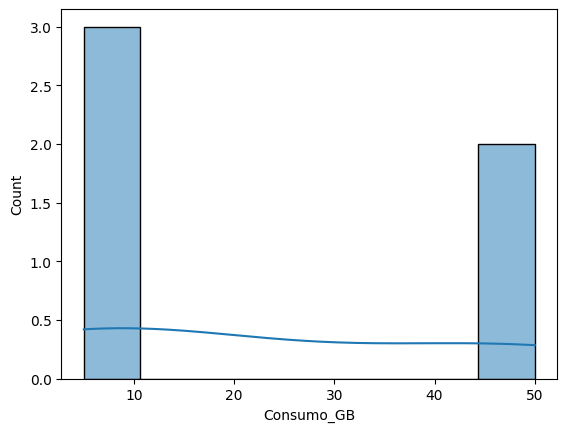

In [ ]:
# Ver histograma de distribución de consumo de datos
sns.histplot(df_clientes["Consumo_GB"], bins=8, kde=True)
plt.show()

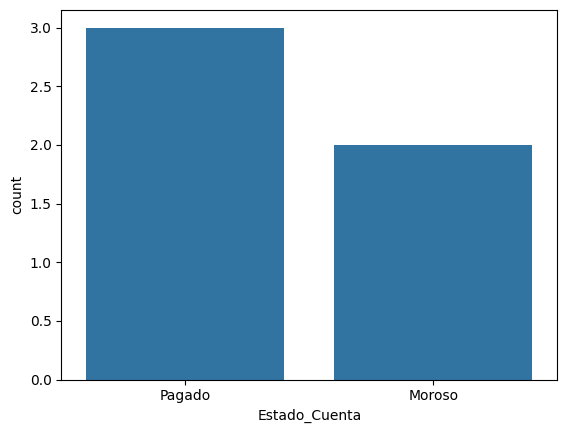

In [43]:
# Gráfico de barras de Estado de Cuenta
sns.countplot(x=df_clientes["Estado_Cuenta"])
plt.show()

<Axes: xlabel='Estado_Cuenta', ylabel='Consumo_GB'>

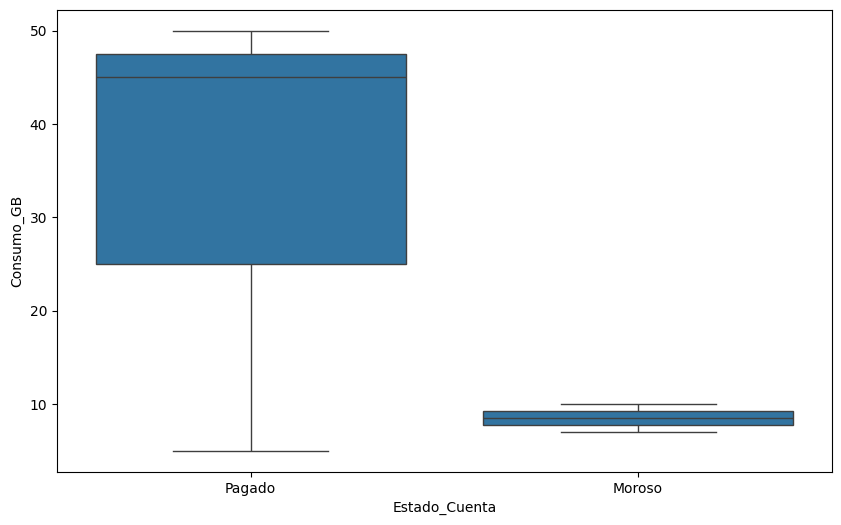

In [ ]:
# Consumo vs Estado de Cuenta
plt.figure(figsize=(10,6))

sns.boxplot(x="Estado_Cuenta", y="Consumo_GB", data=df_clientes)

<Axes: xlabel='Estado_Cuenta', ylabel='Reclamos'>

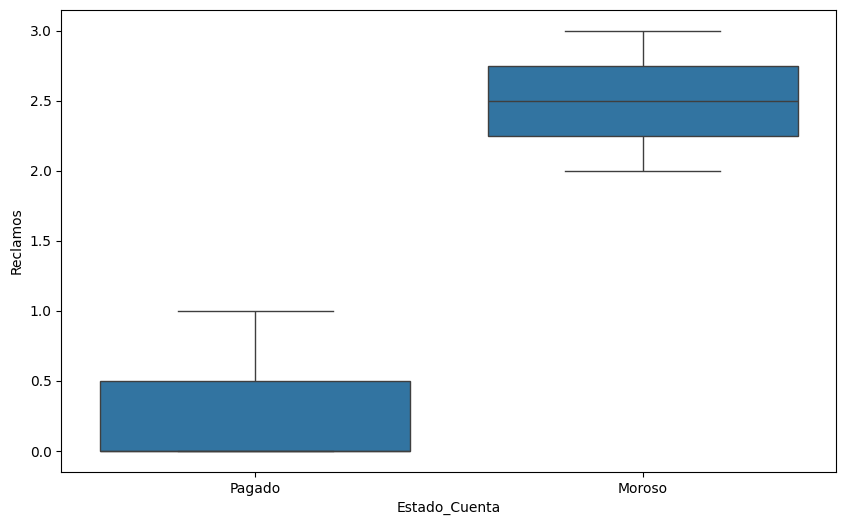

In [45]:
# Consumo vs Estado de Cuenta
plt.figure(figsize=(10,6))

sns.boxplot(x="Estado_Cuenta", y="Reclamos", data=df_clientes)

<h4>4. Interpretación de Resultados</h4>
<p>Pareciera haber dos grupos de personas según el nivel de consumo (bajo o alto). A su vez, los que tienen un menor consumo tienen mayor tendencia hacia las deudas. Por otro lado, los morosos tienen mayor tendencia a realizar reclamos que los clientes pagadores</p>